# This notebook is created As a part of my internship program , provided by BhartIntern.


    Im assigned to a task 

Task = **Machine Learning model to predict the
quality of wine using linear regression
only Jupyter.**

# Background Knowledge

    -This datasets is related to red variants of the Portuguese "Vinho Verde" wine

**Columns Information**

    fixed acidity
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

    volatile acidity
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

    citric acid
found in small quantities, citric acid can add 'freshness' and flavor to wines

    residual sugar
the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

    chlorides
the amount of salt in the wine

    free sulfur dioxide
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

    total sulfur dioxide
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

    density
the density of water is close to that of water depending on the percent alcohol and sugar content

    pH
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

    sulphates
a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and

**Let's ,  first import some  necessary liberaries**

In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [127]:
# importing the dataset
df = pd.read_csv("winequality-red.csv")

In [129]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
557            15.6             0.645         0.49             4.2      0.095   
659             7.1             0.840         0.02             4.4      0.096   
1305            7.5             0.610         0.26             1.9      0.073   
588             5.0             0.420         0.24             2.0      0.060   
1258            6.8             0.640         0.00             2.7      0.123   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
557                  10.0                  23.0  1.00315  2.92       0.74   
659                   5.0                  13.0  0.99700  3.41       0.57   
1305                 24.0                  88.0  0.99612  3.30       0.53   
588                  19.0                  50.0  0.99170  3.72       0.74   
1258                 15.0                  33.0  0.99538  3.44       0.63   

      alcohol  quality  
557      11.1        5  
659      11.0        4  
1305      9.8        5  
588      14.0        8  
1258     11.3        6

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [101]:
df.shape # number of rows and columns

(1599, 12)

chechking for null and missing values

In [102]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

    there aren't any missing values

In [147]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

lets check for outliers

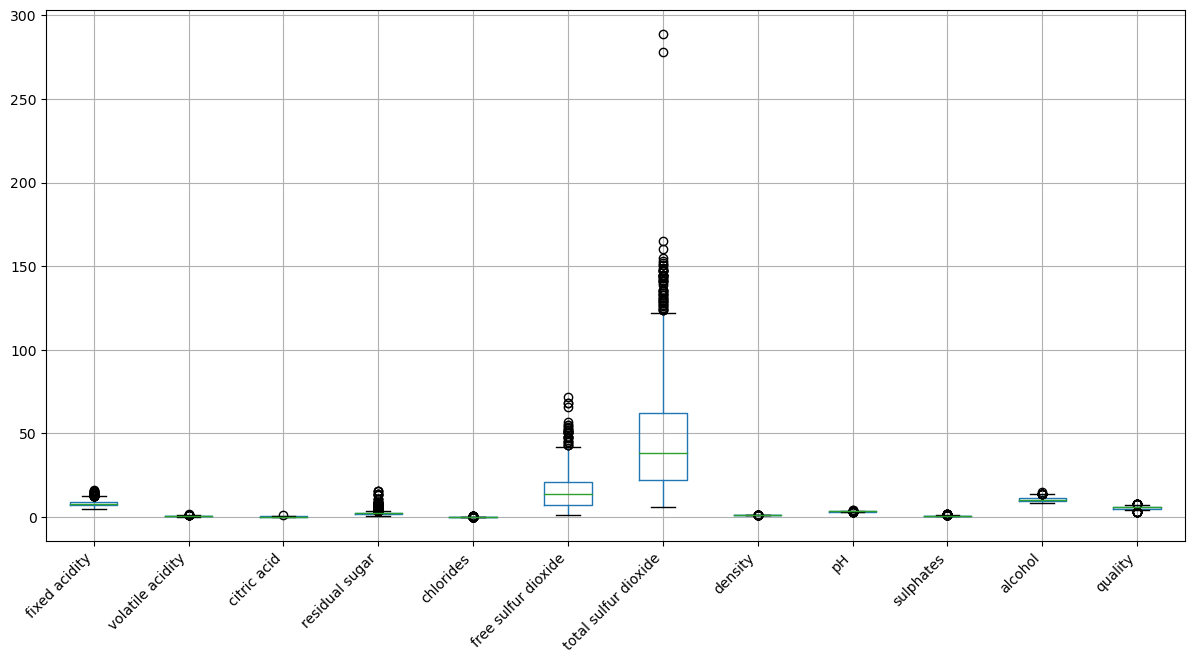

In [103]:
figure , axes = plt.subplots(figsize = (12,6))
figure.autofmt_xdate()
figure.tight_layout()
df.boxplot()
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


`total sulphurt dioxide` have large numebers of outliers , `free sulphur dioxide` and `residual Sugar` also have a bit of ouliers too

Let's see the how the  features are distributed

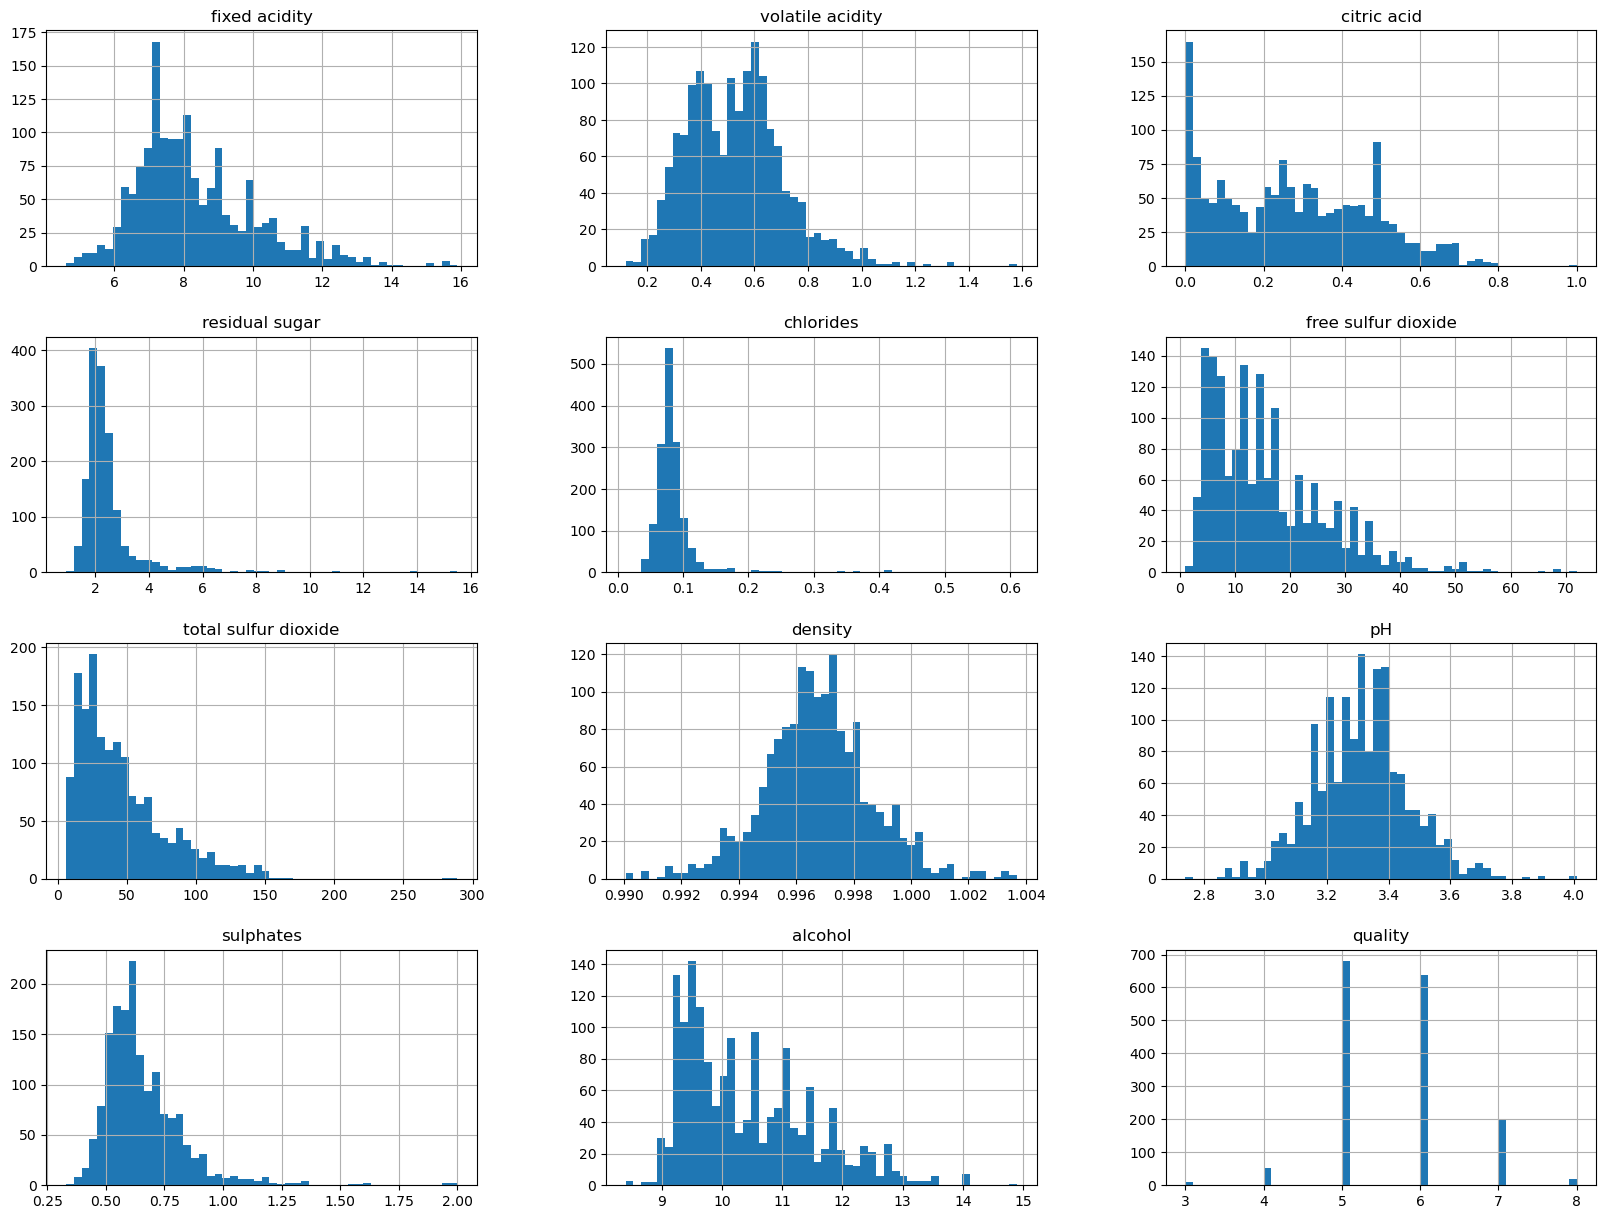

In [134]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15)) # By setting bins=50, the dataset will be divided into 50 equal-width intervals, means whole graph has 50 tops
plt.show()

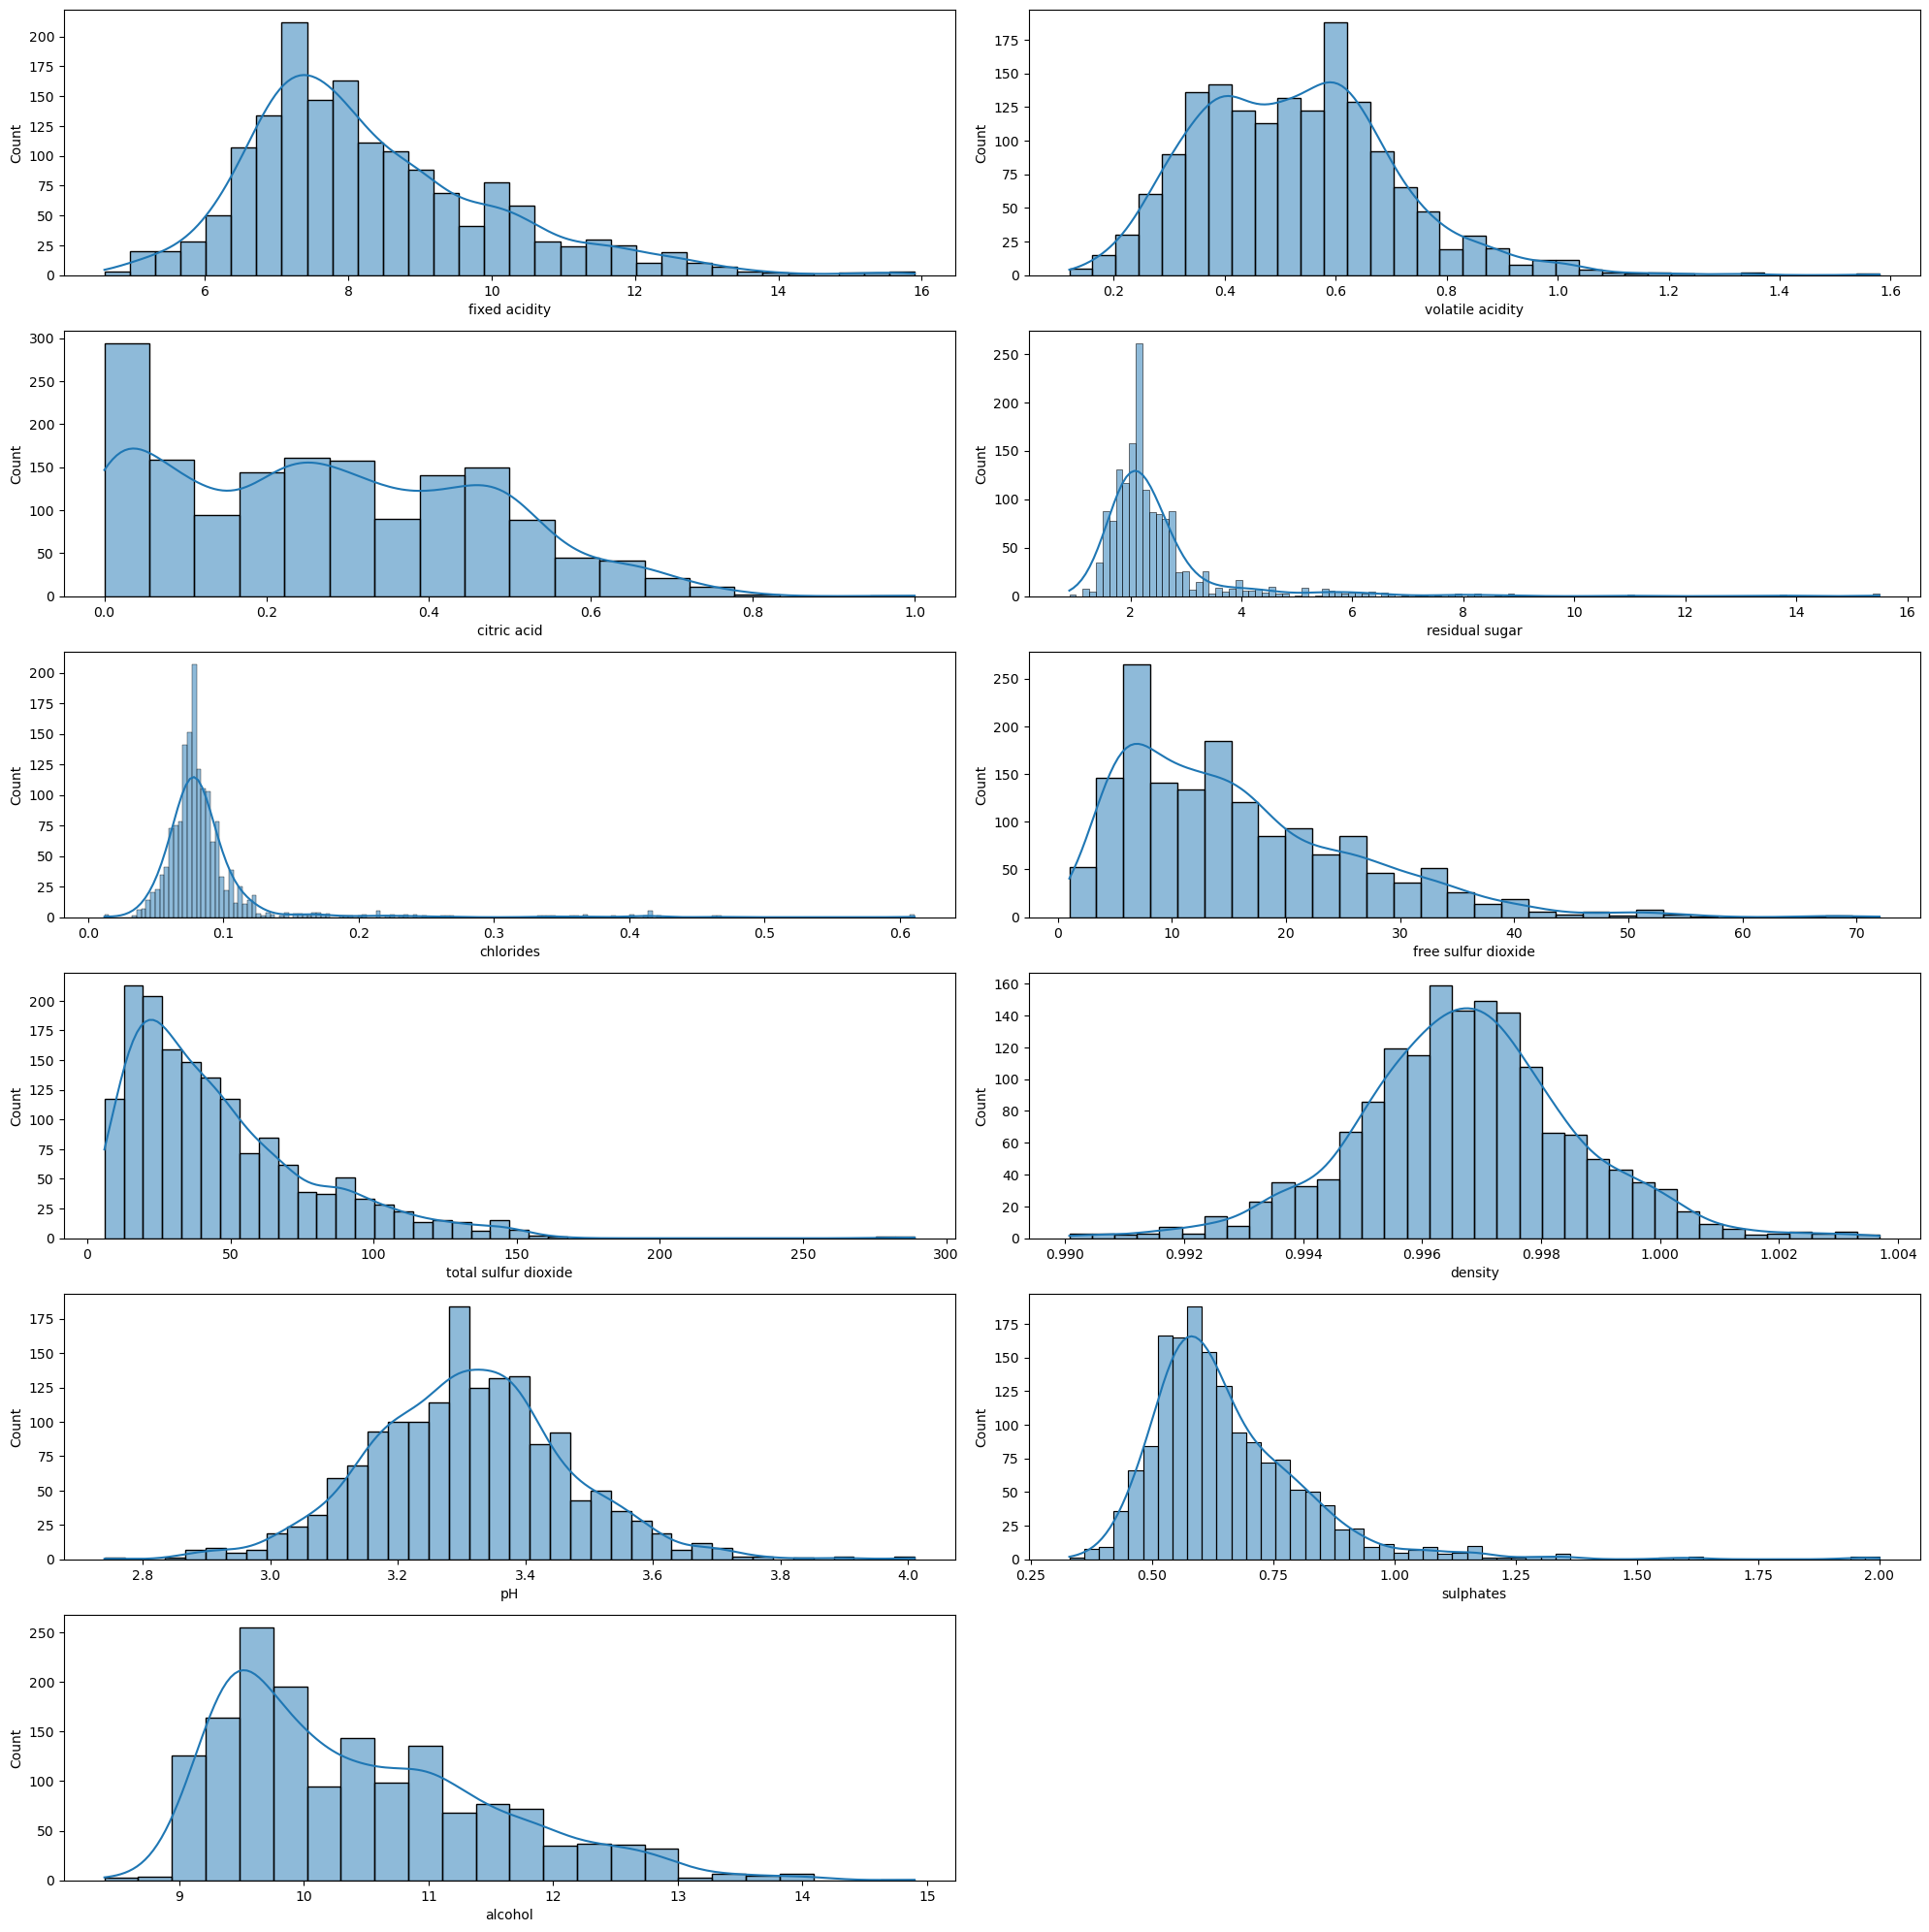

In [133]:
features = [feature for feature in df.drop(columns="quality").columns]
fig = plt.figure(figsize=(20, 20))
for index, column in enumerate(features):
    plt.subplot(6, 2, index + 1)
    sns.histplot(df[column], kde = True)
fig.tight_layout(pad = 1.0)

We need to ensure that all of features must be Normally distributed  , as we can see above some of them are not , we have to deal with this.

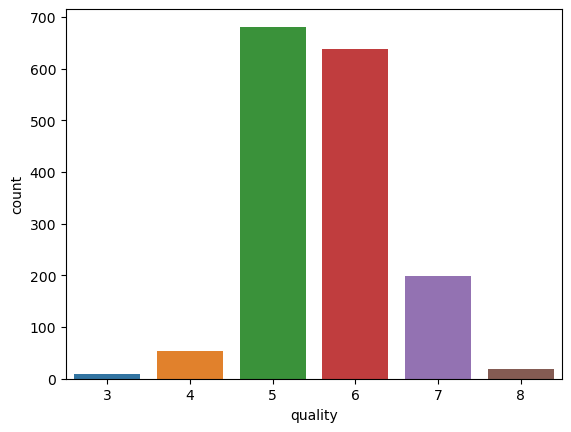

In [105]:
ax = sns.countplot(x='quality', data=df)

most of the wines are of medium category (quality)

## Correlation

one way to check for correlation between attributes is to use the pandas `scatter_matrix()` function,

which plots every numerical attribute against every other numerical attribute. Since there are now 12 numerical attributes, we would get 144 plots,

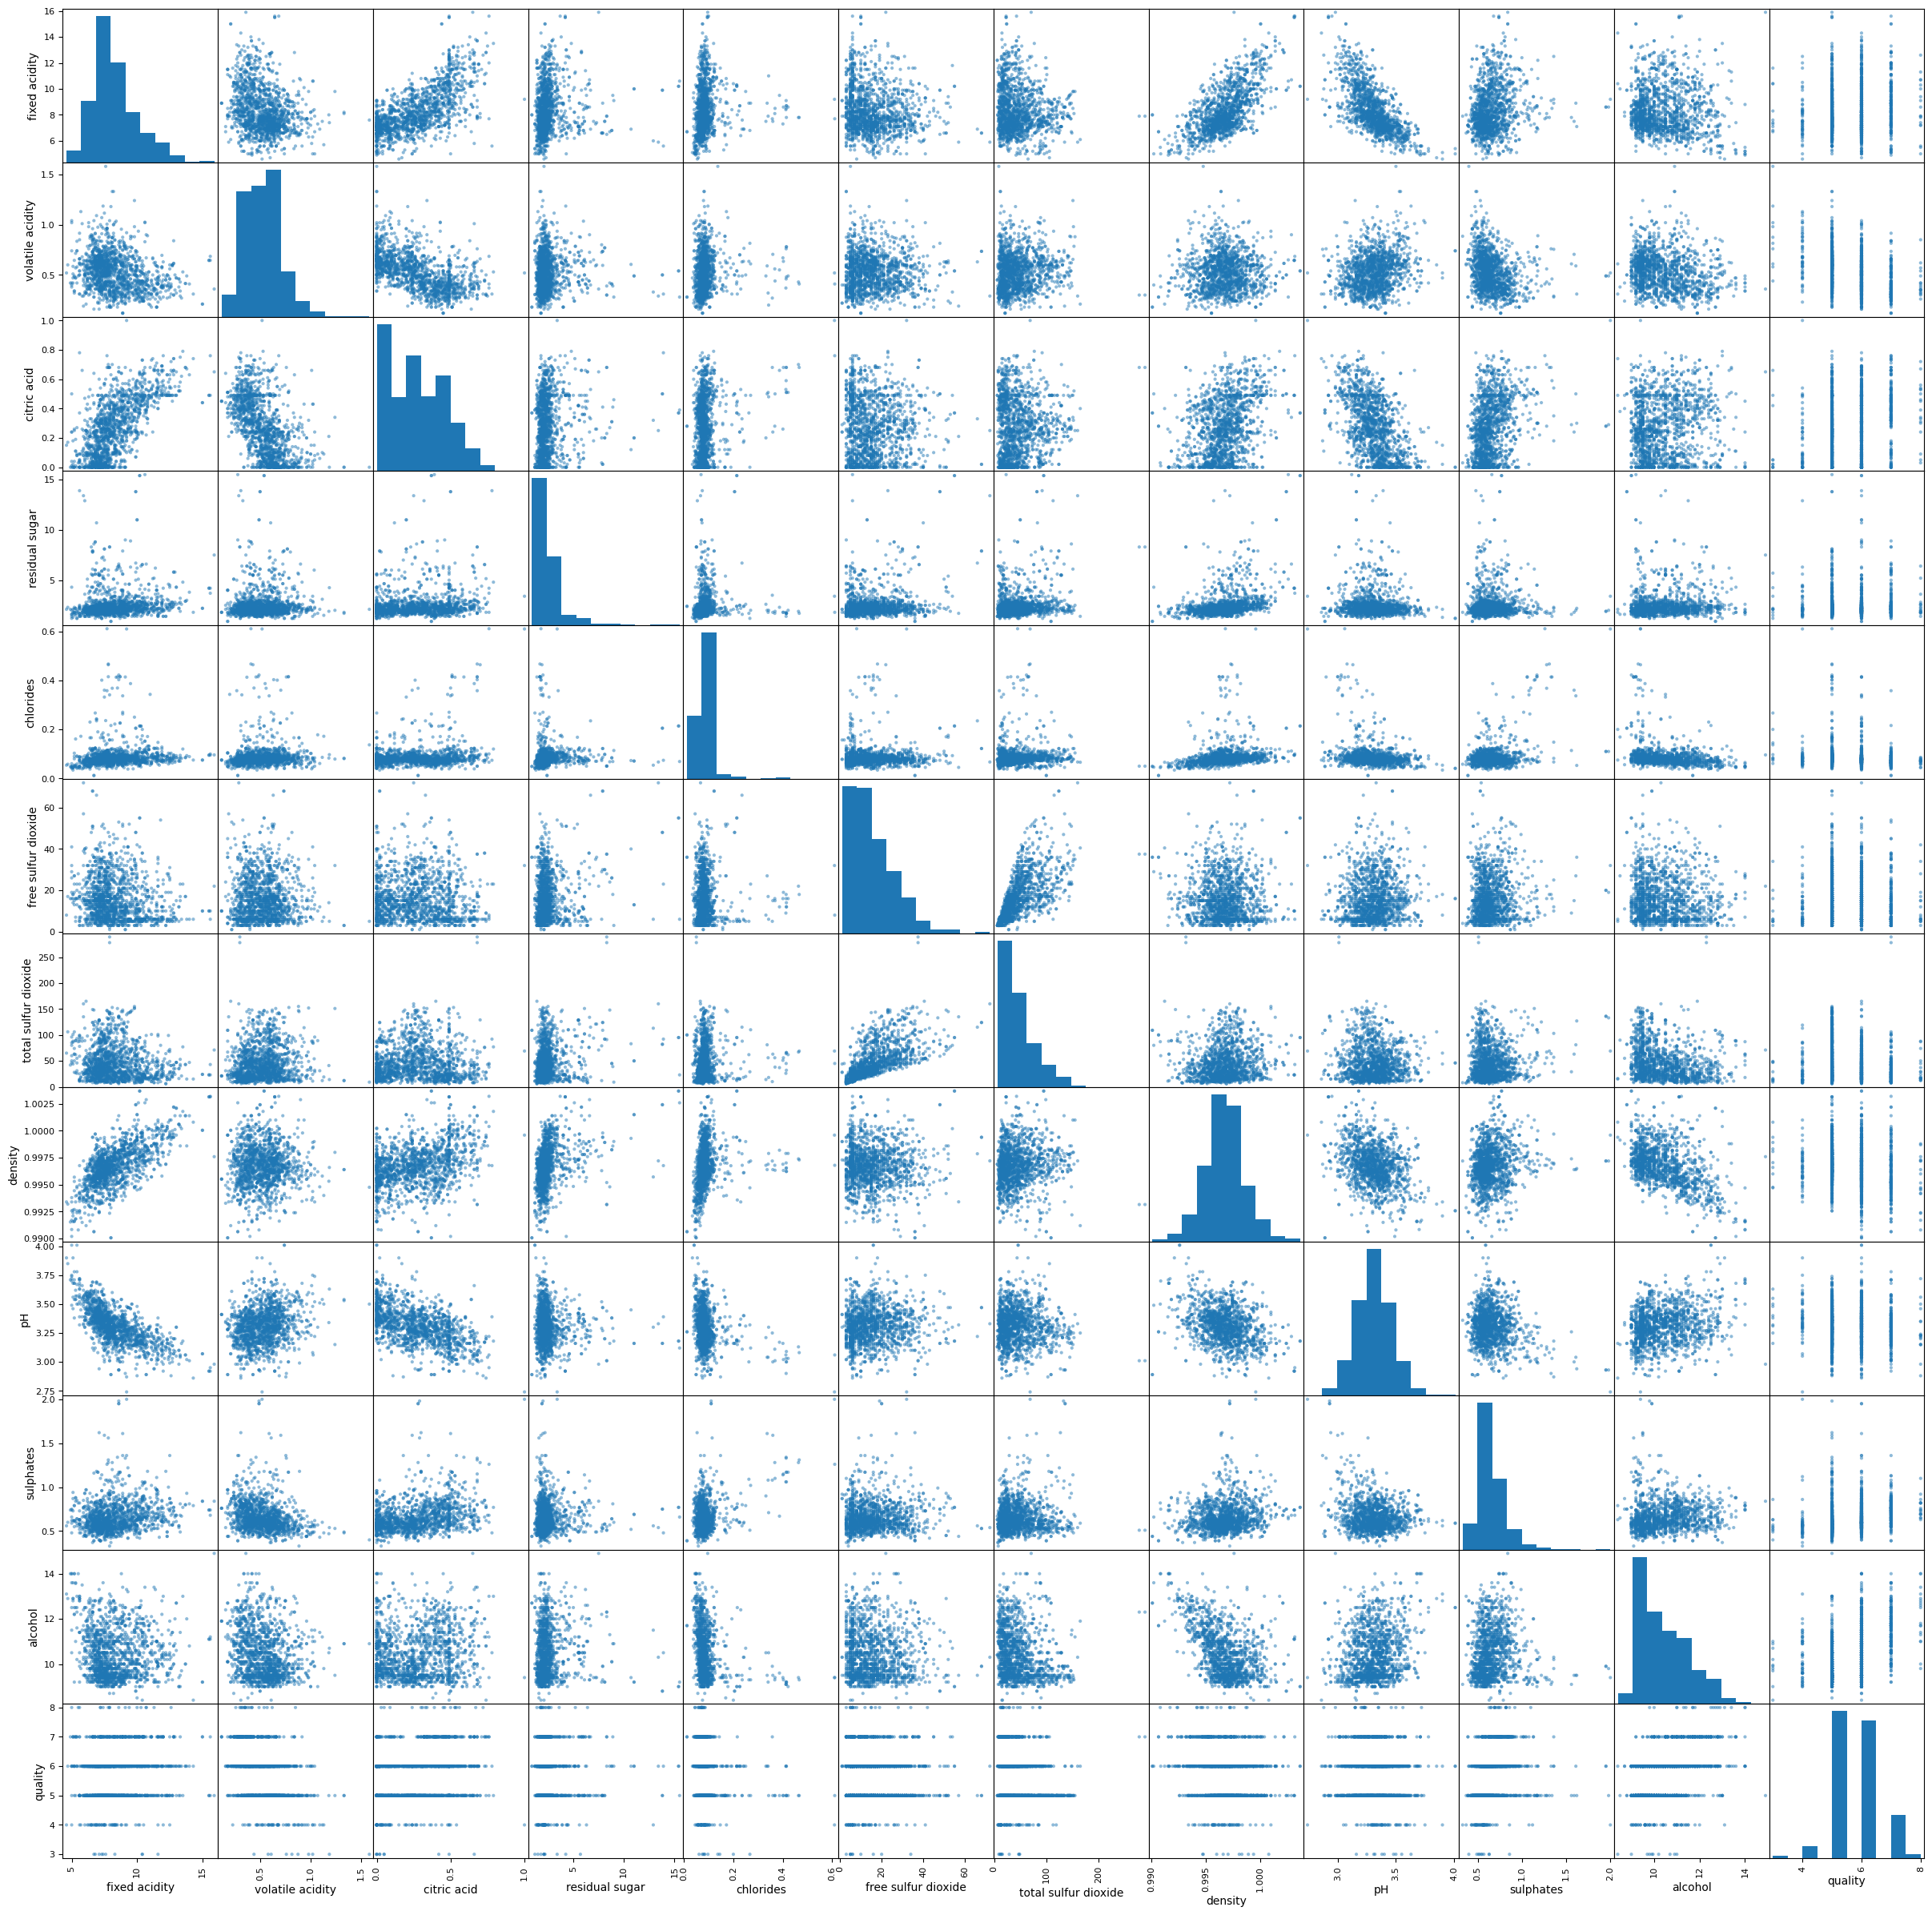

In [138]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(30, 30))
plt.show()

In [106]:
df.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

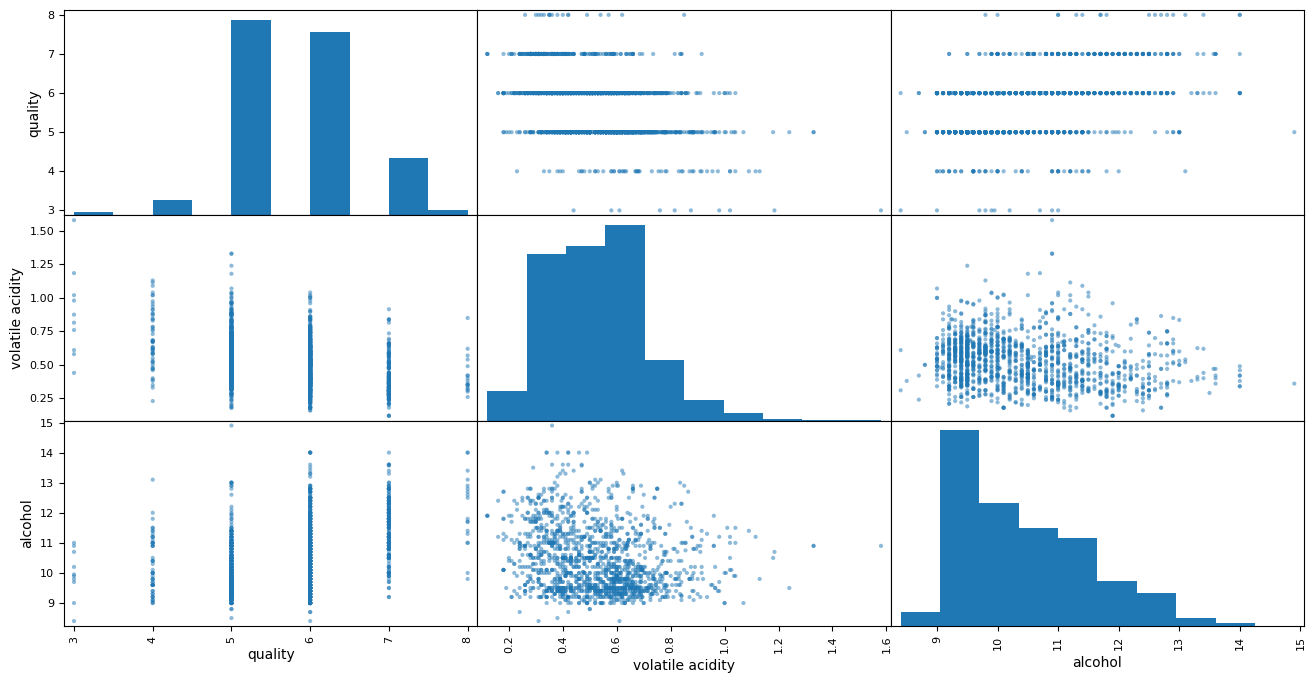

In [143]:
#let’s just focus on a few promising
#attributes that seem most correlated with the quality column

imp_attributes = ["quality" , "volatile acidity" , "alcohol"]
scatter_matrix(df[imp_attributes], figsize=(16, 8))
plt.show()

**The most promising attribute to predict the quality is the alcohol content
 so let’s zoom in on their correlation scatterplot**

<Axes: xlabel='quality', ylabel='alcohol'>

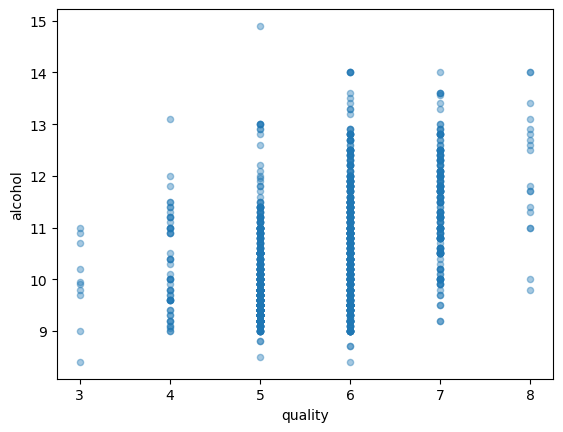

In [144]:
df.plot(kind="scatter", x="quality", y="alcohol",
 alpha=0.4)


Since the quality column have categorial values , its difficult to notice the trend using regression analysis, but im strictly advised to perform this task as a regression Problem

 ####   checking for Multicolinearity

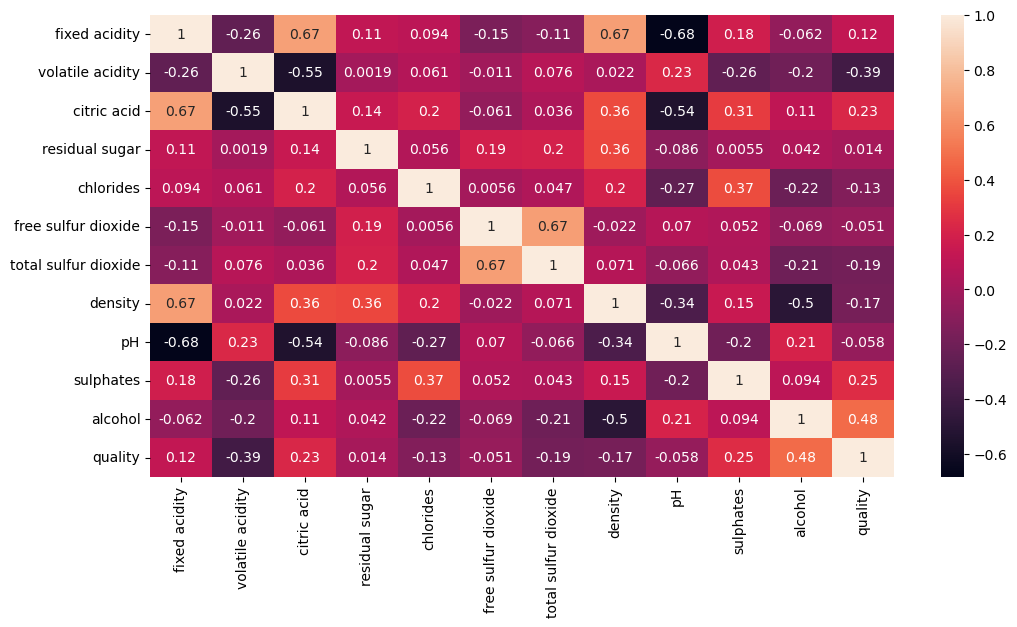

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

its very clear from the heatmap that `PH` , `density` and `citric acid` are both highly correlated with `fixed acidity`. Multicolinearity is not good for regression problem so we will need to deal with that later. 

## Feature Engineering

In [162]:
df_copy = df.copy()

In [163]:
df_copy.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [164]:
df_copy.drop(columns="quality" , inplace = True)

In [165]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

#### let's deal with Outliers

    applying `LogTransformation` to reduce the `skewness` in some of our features

In [166]:
for feature in features:
    if 0 in df_copy[feature].unique():
        pass
    else:
        df_copy[feature] = np.log(df_copy[feature])
df_copy.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.001480         -0.356675         0.00        0.641854  -2.577022   
1       2.054124         -0.127833         0.00        0.955511  -2.322788   
2       2.054124         -0.274437         0.04        0.832909  -2.385967   
3       2.415914         -1.272966         0.56        0.641854  -2.590267   
4       2.001480         -0.356675         0.00        0.641854  -2.577022   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             2.397895              3.526361 -0.002202  1.255616  -0.579818   
1             3.218876              4.204693 -0.003205  1.163151  -0.385662   
2             2.708050              3.988984 -0.003005  1.181727  -0.430783   
3             2.833213              4.094345 -0.002002  1.150572  -0.544727   
4             2.397895              3.526361 -0.002202  1.255616  -0.579818   

    alcohol  
0  2.240710  
1  2.282382  
2  2.282382  
3  2.282382  
4  2.240710

    Let's replot to see how the distributions have changed


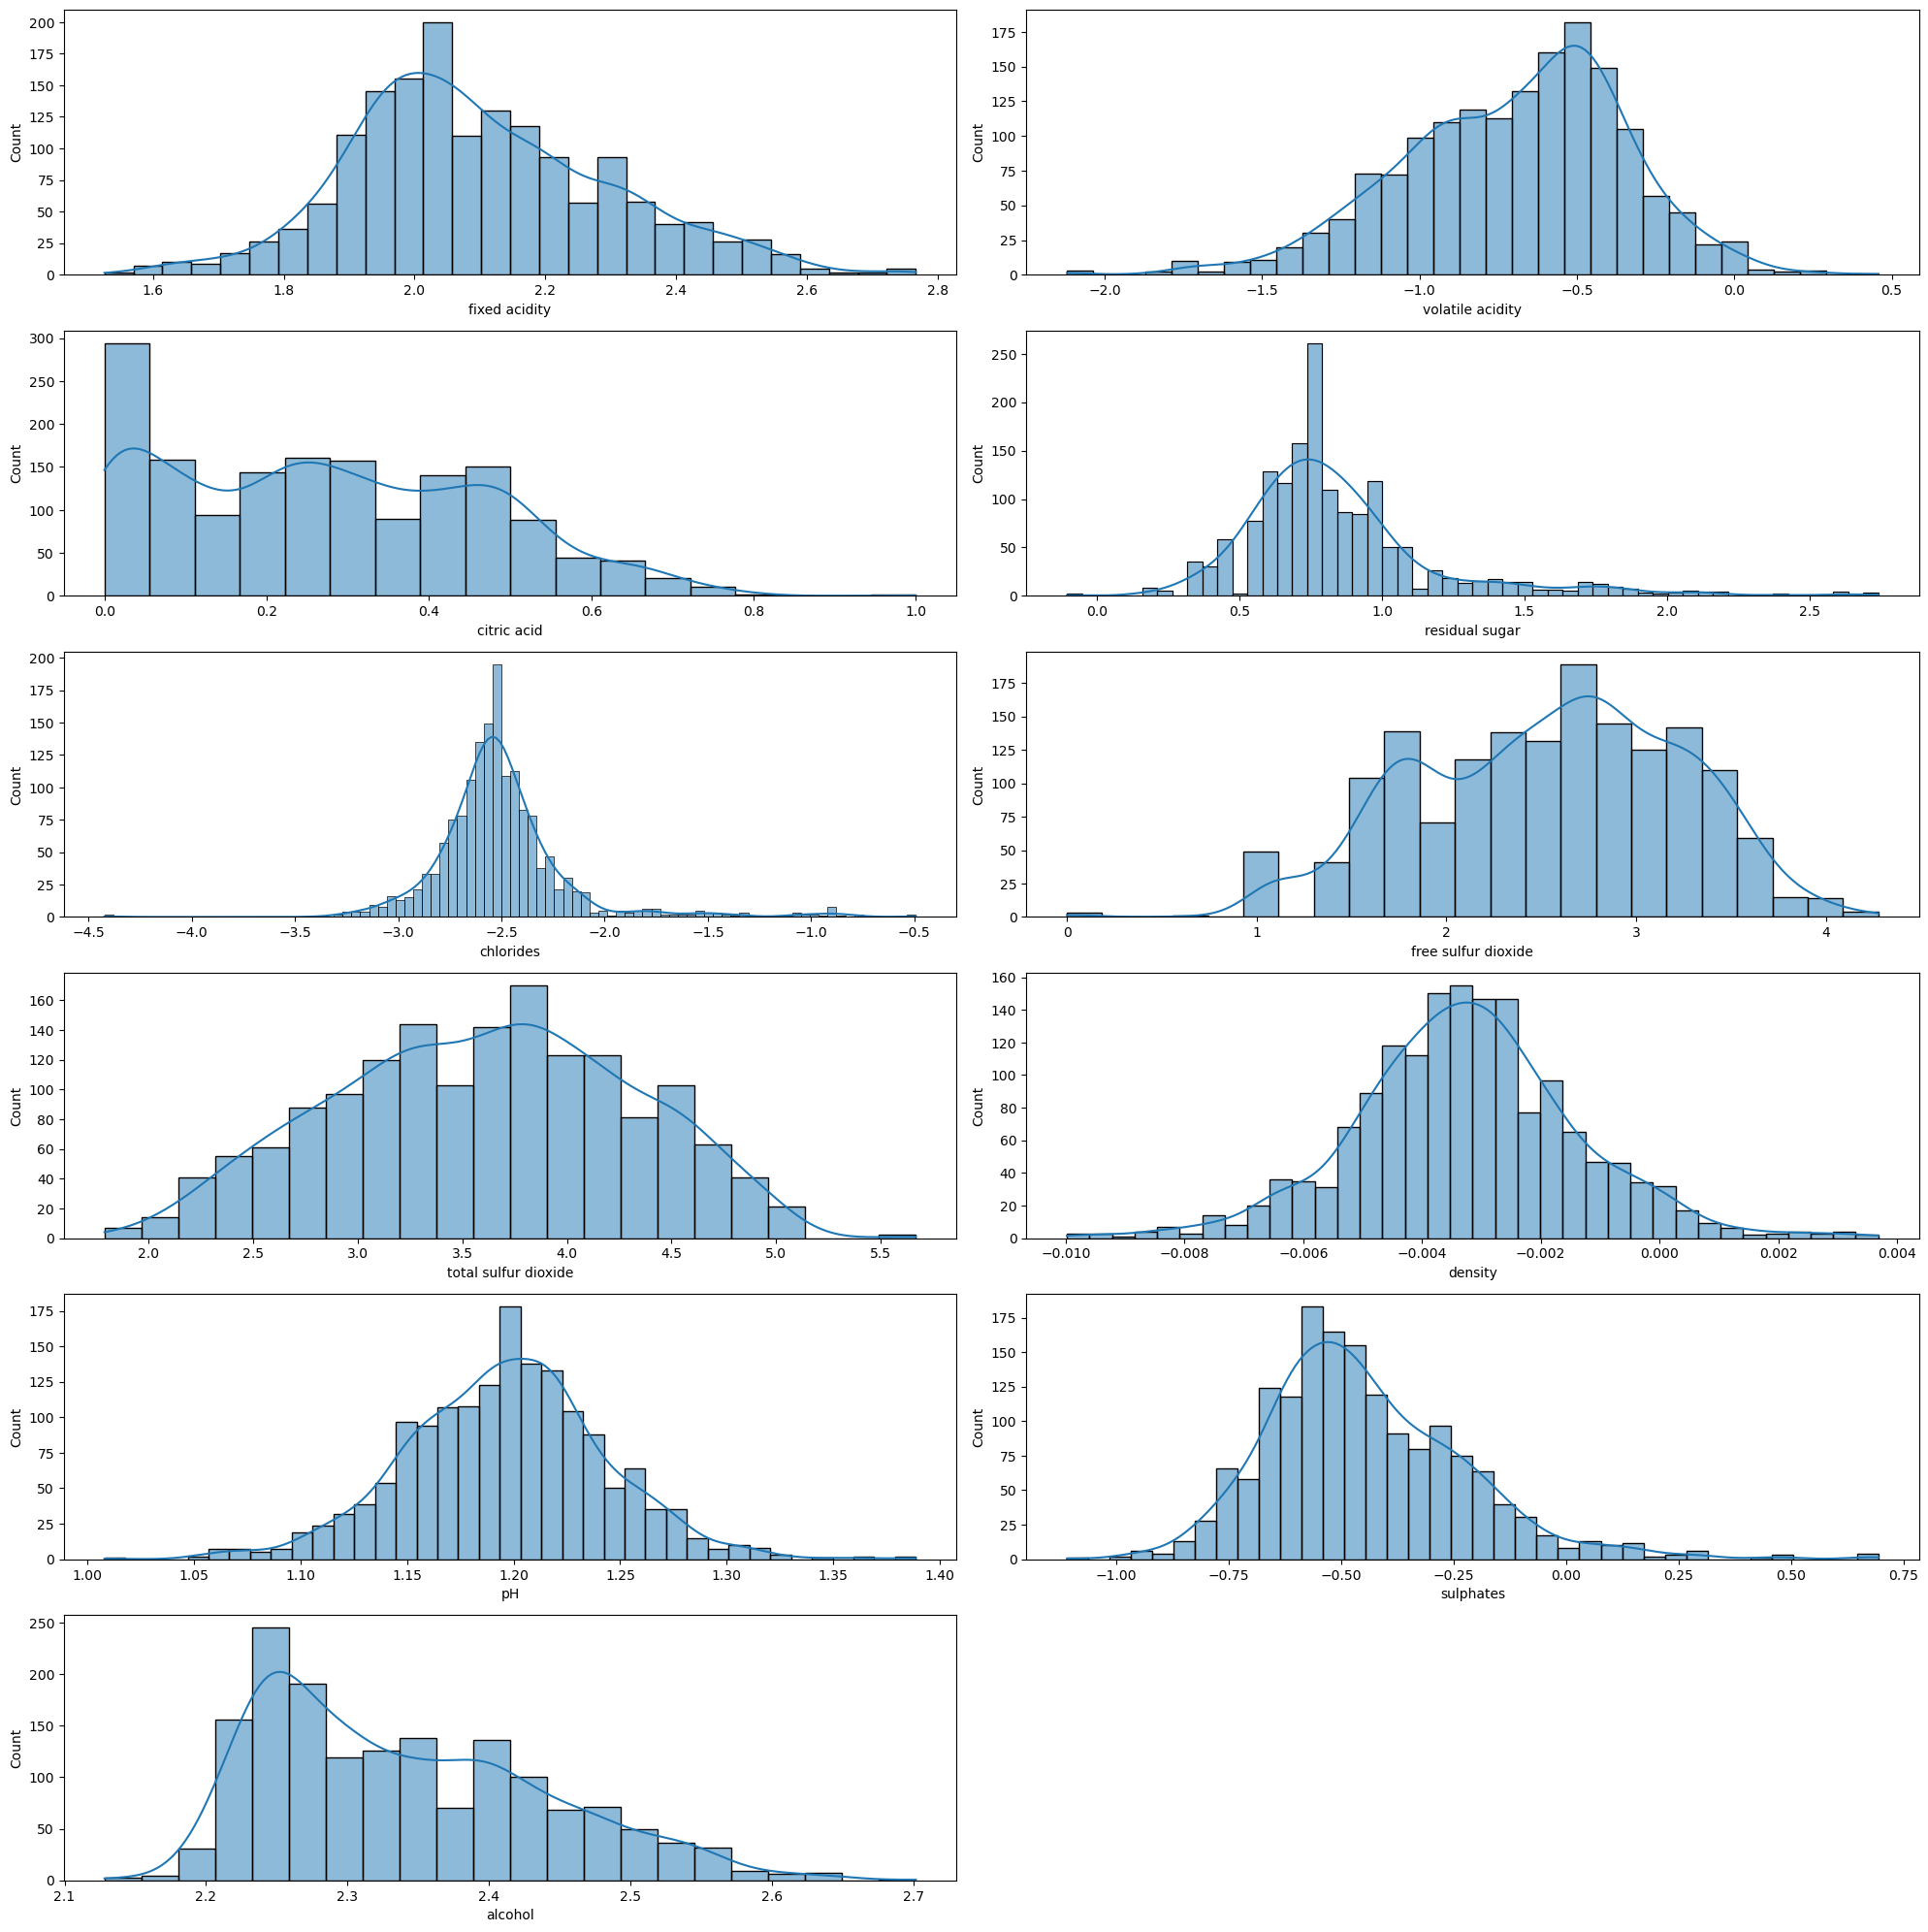

In [167]:
fig = plt.figure(figsize=(20, 20))
for index, feature in enumerate(features):
    plt.subplot(6, 2, index +1)
    sns.histplot(df_copy[feature], kde = True)
fig.tight_layout(pad = 1.0)

    Removing Multicolinear Features

In [171]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [172]:
df_copy = df_copy.drop(["density", "fixed acidity" , "pH"], axis = 1)
df_copy.head()

volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.356675         0.00        0.641854  -2.577022   
1         -0.127833         0.00        0.955511  -2.322788   
2         -0.274437         0.04        0.832909  -2.385967   
3         -1.272966         0.56        0.641854  -2.590267   
4         -0.356675         0.00        0.641854  -2.577022   

   free sulfur dioxide  total sulfur dioxide  sulphates   alcohol  
0             2.397895              3.526361  -0.579818  2.240710  
1             3.218876              4.204693  -0.385662  2.282382  
2             2.708050              3.988984  -0.430783  2.282382  
3             2.833213              4.094345  -0.544727  2.282382  
4             2.397895              3.526361  -0.579818  2.240710

In [168]:
df.columns.size

12

# Preparing model for preediction

In [173]:
# splitting the data into independent and dependent variables
X = df_copy
y = df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
print(f"shape of X_train is: {X_train.shape}")
print(f"shape of y_train is: {y_train.shape}")
print(f"shape of X_test is: {X_test.shape}")
print(f"shape of y_test is: {y_test.shape}")

shape of X_train is: (1279, 8)
shape of y_train is: (1279,)
shape of X_test is: (320, 8)
shape of y_test is: (320,)


    LINEAR REGRESSION

In [175]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [176]:
model.fit(X_train, y_train)

LinearRegression()

In [177]:
y_pred=model.predict(X_test)

In [178]:
from sklearn.metrics import r2_score
score_r2 = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 40.0%


its obvious that our accuracy is this much low , as this is an classification problem

In [183]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
mean_AE = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(mean_AE, 3)))
mean_SE = np.sqrt(mean_absolute_error(y_test, y_pred))
print("The Mean Squarede Error of our Model is {}".format(round(mean_SE, 2)))


The Mean Absolute Error of our Model is 0.502
The Mean Squarede Error of our Model is 0.71


    -We can see that the RMSE value is larger than the MAE. This is a result of some large errors in the dataset.

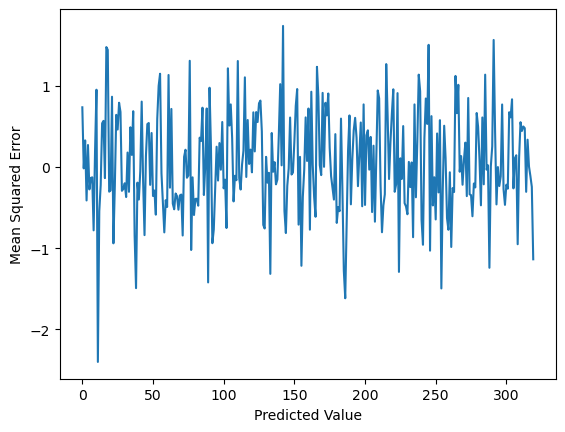

In [212]:
# example of increase in mean squared error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# calculate errors
errors = []
for i in range(len(y_test)):
# calculate error
    err = (y_test.iloc[i] - y_pred[i])
# store error
    errors.append(err)
# report error
    # print('>%.1f, %.1f = %.3f' % (y_test.iloc[i], y_pred[i], err))
# plot errors
pyplot.plot(errors)
# pyplot.xticks(ticks=[i for i in range(len(errors))], labels=y_pred)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

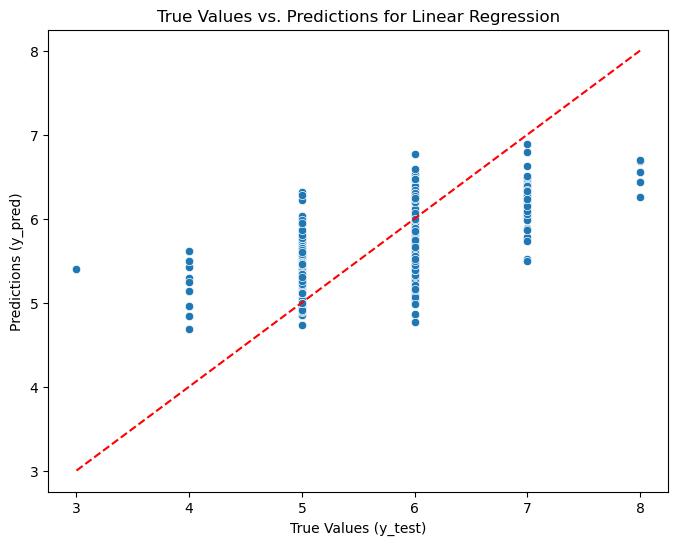

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel("True Values (y_test)")
plt.ylabel("Predictions (y_pred)")
plt.title("True Values vs. Predictions for Linear Regression")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()
